### Cleaning US_category_id.json

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/Spardha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [4]:
US_category_id = pd.read_json('US_category_id.json')
US_category_id["id"] = US_category_id["items"].apply(lambda x : x["id"])
US_category_id["title"] = US_category_id["items"].apply(lambda x : x["snippet"]["title"])
US_category_id.drop(["items","kind", "etag"], axis =1, inplace = True)
US_category_id["id"] = US_category_id["id"].astype("int64")
US_category_id.rename(columns = {"title": "category_name"}, inplace=True) 
US_category_id.head(3)

,id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music


In [5]:
US_category_id.shape

(32, 2)

In [6]:
US_category_id.category_name.nunique()

31

In [7]:
US_category_id.category_name.value_counts()

Comedy                   2
Film & Animation         1
Nonprofits & Activism    1
Shows                    1
Shorts                   1
Thriller                 1
Sci-Fi/Fantasy           1
Horror                   1
Foreign                  1
Family                   1
Drama                    1
Documentary              1
Classics                 1
Action/Adventure         1
Anime/Animation          1
Movies                   1
Science & Technology     1
Autos & Vehicles         1
Education                1
Howto & Style            1
News & Politics          1
Entertainment            1
People & Blogs           1
Videoblogging            1
Gaming                   1
Travel & Events          1
Short Movies             1
Sports                   1
Pets & Animals           1
Music                    1
Trailers                 1
Name: category_name, dtype: int64

In [8]:
# two categories for Comedy 
US_category_id[US_category_id.category_name == "Comedy"]

,id,category_name
10,23,Comedy
21,34,Comedy


### Cleaning USvideos.csv

In [9]:
USvideos = pd.read_csv("USvideos.csv")
USvideos.shape

(40949, 16)

In [10]:
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [11]:
USvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [12]:
df = pd.merge(USvideos, US_category_id, left_on = "category_id", right_on="id", how = "left")
df.shape

(40949, 18)

In [13]:
#highest : entertainment and music categories but contains duplicate rows
np.round(df["category_name"].value_counts()/len(df),2)

Entertainment            0.24
Music                    0.16
Howto & Style            0.10
Comedy                   0.08
People & Blogs           0.08
News & Politics          0.06
Science & Technology     0.06
Film & Animation         0.06
Sports                   0.05
Education                0.04
Pets & Animals           0.02
Gaming                   0.02
Travel & Events          0.01
Autos & Vehicles         0.01
Nonprofits & Activism    0.00
Shows                    0.00
Name: category_name, dtype: float64

In [14]:
#no. of unique videos
df.video_id.nunique()

6351

In [15]:
# one video id having many rows with same information for text var(s)
df.loc[df.video_id == "2kyS6SvSYSE", :]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,22,People & Blogs


In [16]:
df.sort_values(by = ["video_id", "trending_date", "publish_time"], inplace=True)
df = df.groupby("video_id").last().reset_index()
df.shape

(6351, 18)

In [17]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'category_name'],
      dtype='object')

This clean dataset was saved and imported again to run analysis and modeling etc. There were few redundant rows (redundant text was dragged to the next rows) which got truncated. Hence, the new shape is (6436, 18)

In [31]:
youtube_data=pd.read_csv('youtube_data.csv')

In [32]:
print(youtube_data.info())
print(youtube_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6436 non-null   object 
 1   video_id                6368 non-null   object 
 2   trending_date           6368 non-null   object 
 3   title                   6351 non-null   object 
 4   channel_title           6351 non-null   object 
 5   category_id             6351 non-null   float64
 6   publish_time            6351 non-null   object 
 7   tags                    6351 non-null   object 
 8   views                   6351 non-null   float64
 9   likes                   6351 non-null   float64
 10  dislikes                6351 non-null   float64
 11  comment_count           6351 non-null   float64
 12  thumbnail_link          6351 non-null   object 
 13  comments_disabled       6351 non-null   object 
 14  ratings_disabled        6351 non-null   

In [33]:
#Check for missing values
print(youtube_data.isnull().sum())

Unnamed: 0                  0
video_id                   68
trending_date              68
title                      85
channel_title              85
category_id                85
publish_time               85
tags                       85
views                      85
likes                      85
dislikes                   85
comment_count              85
thumbnail_link             85
comments_disabled          85
ratings_disabled           85
video_error_or_removed     85
description               182
id                        102
category_name             102
dtype: int64


In [34]:
#Check for duplicates
print(youtube_data.duplicated().sum())

39


In [35]:
df2 = youtube_data.drop_duplicates(keep=False)
df2=df2.dropna()
print(df2.duplicated().sum())

0


In [36]:
df2.tail()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category_name
6430,6345,zvjqcoiOPbE,18.12.01,Breaking Benjamin - Red Cold River (Audio Only),BreakingBenjaminVEVO,10.0,2018-01-05T05:00:03.000Z,"breaking benjamin red cold river|""breaking ben...",1329689.0,47497.0,1170.0,5787.0,https://i.ytimg.com/vi/zvjqcoiOPbE/default.jpg,False,False,False,Red Cold River is available here:\nDownload: h...,10.0,Music
6431,6346,zwEn-ambXLw,18.31.03,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10.0,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",190898.0,6731.0,113.0,292.0,https://i.ytimg.com/vi/zwEn-ambXLw/default.jpg,False,False,False,I was lucky enough to lay the original demo fo...,10.0,Music
6432,6347,zxUwbflE1SY,17.19.11,100 People Hold Their Breath for as Long as Th...,Cut,24.0,2017-11-13T13:00:10.000Z,"breath|""hold""|""funny""|""holding breath""|""breath...",225280.0,5770.0,150.0,1312.0,https://i.ytimg.com/vi/zxUwbflE1SY/default.jpg,False,False,False,Get Cut swag here: http://cut.com/shop\n\nDon’...,24.0,Entertainment
6434,6349,zy0b9e40tK8,17.14.11,Dark | Official Trailer [HD] | Netflix,Netflix,24.0,2017-11-09T09:00:07.000Z,"Netflix|""Baran Bo Odar""|""Jantje Friese""|""DARK""...",378750.0,5642.0,146.0,675.0,https://i.ytimg.com/vi/zy0b9e40tK8/default.jpg,False,False,False,The disappearance of two kids in the German sm...,24.0,Entertainment
6435,6350,zzQsGL_F9_c,18.06.02,Budweiser | Beer Country | :60,Budweiser,24.0,2018-01-30T18:30:04.000Z,"Budweiser|""Super Bowl""|""Clydesdales""|""Bud""|""Th...",199041.0,1415.0,121.0,62.0,https://i.ytimg.com/vi/zzQsGL_F9_c/default.jpg,False,False,False,This is a story bigger than beer. It’s a story...,24.0,Entertainment


In [37]:
df2=df2.drop(columns=['Unnamed: 0'])

In [38]:
df2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,category_name
0,-0CMnp02rNY,18.11.06,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24.0,2018-06-04T13:00:00.000Z,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359.0,9773.0,332.0,423.0,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,False,False,False,Ocean's 8 star Mindy Kaling dished on bringing...,24.0,Entertainment
1,-0NYY8cqdiQ,18.01.02,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,24.0,2018-01-29T14:00:39.000Z,"megan mullally|""megan""|""mullally""|""will and gr...",563746.0,4429.0,54.0,94.0,https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg,False,False,False,Ellen and Megan Mullally have known each other...,24.0,Entertainment
2,-1Hm41N0dUs,18.30.04,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23.0,2018-04-27T07:30:02.000Z,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1882352.0,38165.0,530.0,1412.0,https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg,False,False,False,"Benedict Cumberbatch, Don Cheadle, Elizabeth O...",23.0,Comedy
3,-1yT-K3c6YI,17.30.11,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,22.0,2017-11-28T18:30:43.000Z,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",198315.0,6950.0,184.0,735.0,https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg,False,False,False,Check out the video we did on the Merrell Twin...,22.0,People & Blogs
4,-2RVw2_QyxQ,17.16.11,2017 Champions Showdown: Day 3,Saint Louis Chess Club,27.0,2017-11-12T02:39:01.000Z,"Chess|""Saint Louis""|""Club""",71089.0,460.0,27.0,20.0,https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg,False,False,False,The Saint Louis Chess Club hosts a series of f...,27.0,Education


### Creating a Clean Dataset ('updated_youtube_data.csv')

In [54]:
#Converting this data to the final cleaned dataset ('updated_youtube_data.csv') that will be used in our analysis
#df2.to_csv('updated_youtube_data.csv', index=False)

### Exploratory Data Analysis

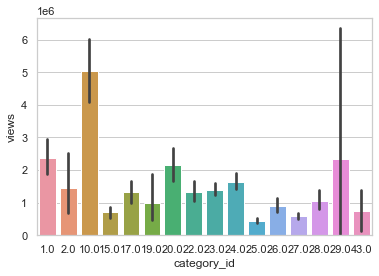

In [39]:
#Visualizing the dataset
sns.set(style="whitegrid")
sns.barplot(x="category_id", y="views", data=df2)
plt.show()

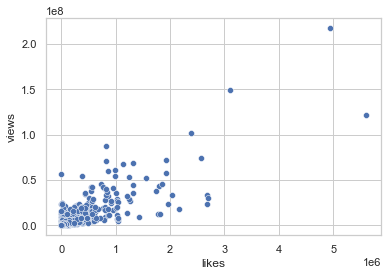

In [40]:
#Exploring relationships between variables
sns.scatterplot(x="likes", y="views", data=df2)
plt.show()

In [41]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df2['likes'], df2['views'])
print('Pearson correlation: %.3f' % corr)

Pearson correlation: 0.832


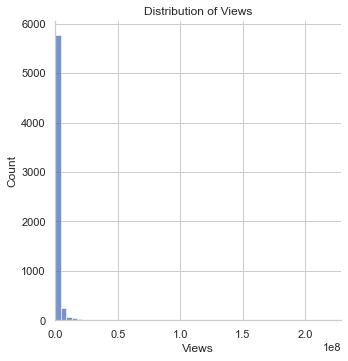

In [42]:
sns.displot(df2['views'], kde=False, bins=50)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.xlim(left=0)  # autoscale x-axis from zero
plt.show()

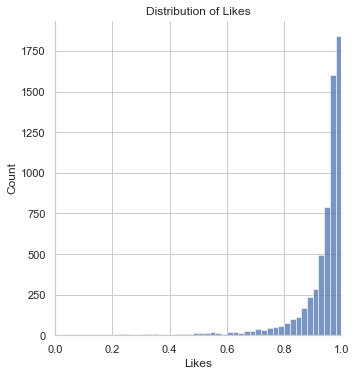

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

likes_ratio = df2['likes'] / (df2['likes'] + df2['dislikes'])

# Plotting the distribution of likes
sns.displot(likes_ratio, kde=False, bins=50)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Count')
plt.xlim(min(likes_ratio), max(likes_ratio))
plt.show()

In [46]:
from scipy.special import logit
# compute the logit transform of the like ratio
df2['logit_like_ratio'] = logit(df2['likes'] / (df2['likes'] + df2['dislikes']))

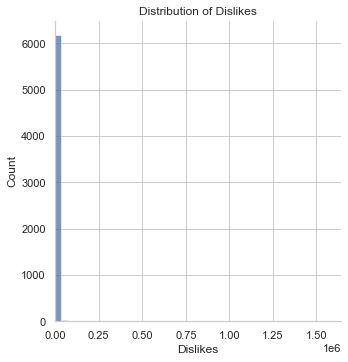

In [47]:
sns.displot(df2['dislikes'], kde=False, bins=50)
plt.title('Distribution of Dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Count')
plt.xlim(min(df2['dislikes']), max(df2['dislikes']))
plt.show()

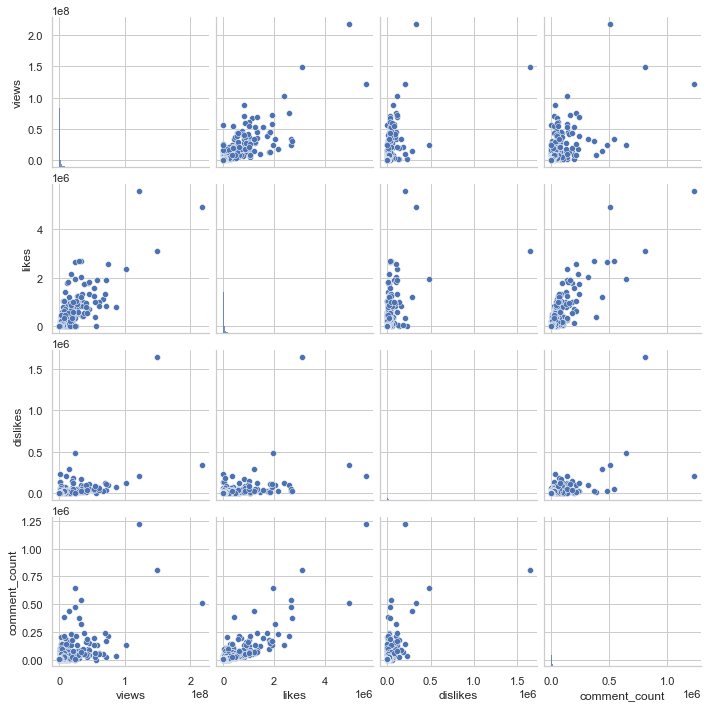

In [48]:
#Visualizing the correlation between variables
sns.pairplot(df2[['views', 'likes', 'dislikes', 'comment_count']])
plt.show()

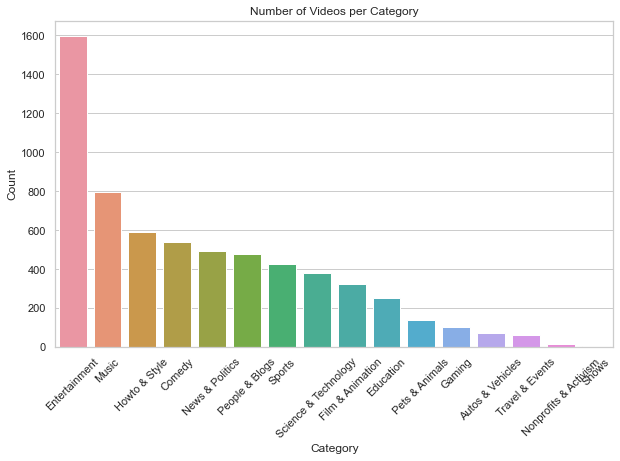

In [49]:
# Visualizing the number of videos per category
category_count = df2['category_name'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_count.index, y=category_count.values)
plt.title('Number of Videos per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

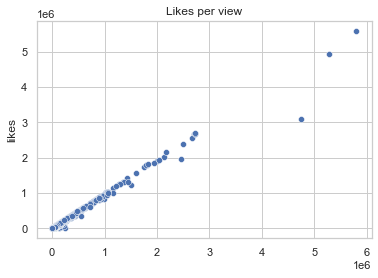

In [50]:
#Exploring the relationship between views and likes
sns.scatterplot(x=df2.likes+df2.dislikes, y='likes', data=df2)
plt.title('Likes per view')
plt.show()

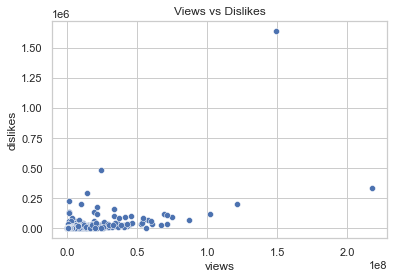

In [51]:
#Exploring the relationship between views and dislikes
sns.scatterplot(x='views', y='dislikes', data=df2)
plt.title('Views vs Dislikes')
plt.show()

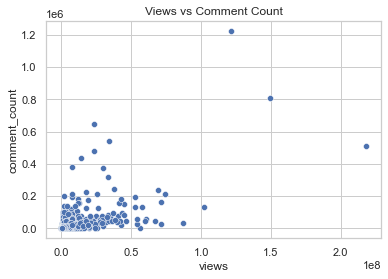

In [52]:
#Exploring the relationship between views and comment count
sns.scatterplot(x='views', y='comment_count', data=df2)
plt.title('Views vs Comment Count')
plt.show()

In [53]:
corr_views_likes, _ = pearsonr(df2['views'], df2['likes'])
print('Pearson correlation between views and likes: %.3f' % corr_views_likes)

Pearson correlation between views and likes: 0.832
